In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="resource_tracker.*")

In [2]:
import networkx as nx
import numpy as np
from graphrag.query import (
    semantic_search, relationship_queries, rag_queries, multi_hop_exploration,
    analyze_clusters, visualize_collaboration_network
)

In [3]:
def convert_embeddings(G):
    for node, data in G.nodes(data=True):
        if 'embedding' in data and isinstance(data['embedding'], str):
            data['embedding'] = np.array(
                [float(x) for x in data['embedding'].split(';')]
            )

In [4]:
graph_path = "data/processed/graph.graphml"
G = nx.read_graphml(graph_path)
convert_embeddings(G)
print("Graph loaded.")

Graph loaded.



=== Semantic Search: 'statistical methods using machine learning' ===
Top 5 results:

[1] Score: 0.4409, Cluster: 2
Title: Boosting Algorithms: Regularization, Prediction and Model Fitting
URL: https://arxiv.org/abs/0804.2752
Abstract: We present a statistical perspective on boosting. Special emphasis is given to estimating potentially complex parametric or nonparametric models, incl...

[2] Score: 0.4068, Cluster: 5
Title: Evaluating Conditional Cash Transfer Policies with Machine Learning Methods
URL: https://arxiv.org/abs/1803.06401
Abstract: This paper presents an out-of-sample prediction comparison between major machine learning models and the structural econometric model. Over the past d...

[3] Score: 0.3685, Cluster: 2
Title: Kernel Bayes' rule
URL: https://arxiv.org/abs/1009.5736
Abstract: A nonparametric kernel-based method for realizing Bayes' rule is proposed, based on representations of probabilities in reproducing kernel Hilbert spa...

[4] Score: 0.3514, Cluster: 5
Titl

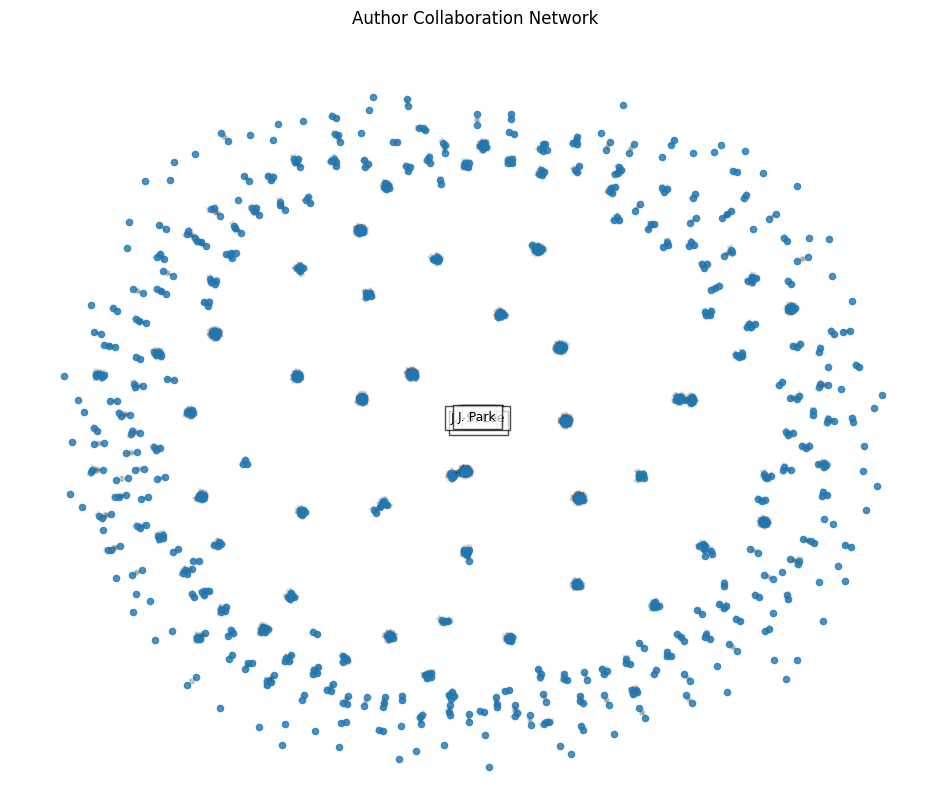

In [5]:
search_query = "statistical methods using machine learning"  

semantic_results = semantic_search(G, search_query)

if semantic_results:
    top_paper_node = semantic_results[0][0]
    relationship_queries(G, top_paper_node)

    rag_queries(G)

    multi_hop_exploration(G, top_paper_node)
else:
    top_paper_node = None
    print("No semantic search results found. Please try a different query.")

analyze_clusters(G)

output_file = "collaboration_network.png"
visualize_collaboration_network(G, output_file)
from IPython.display import Image, display
#display(Image(filename=output_file))